# EMA-based signal strategy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import bt
import talib

In [4]:
price_data = pd.read_csv("../../assets/TSLA.csv", index_col='Date', parse_dates=True)

In [5]:
ema = pd.DataFrame()

In [6]:
# Calculate the EMA
ema["Close"]= talib.EMA(price_data['Close'], timeperiod=20)


In [7]:
# ema.index = price_data.index

In [8]:
# Define the strategy
bt_strategy = bt.Strategy('AboveEMA',
                          [bt.algos.SelectWhere(price_data[["Close"]] > ema[["Close"]]),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

In [9]:
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


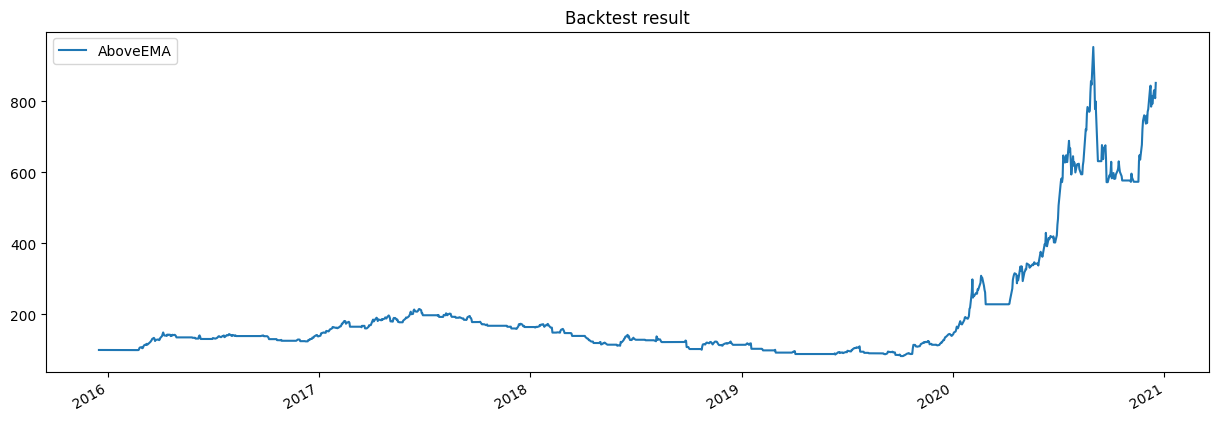

In [10]:
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()